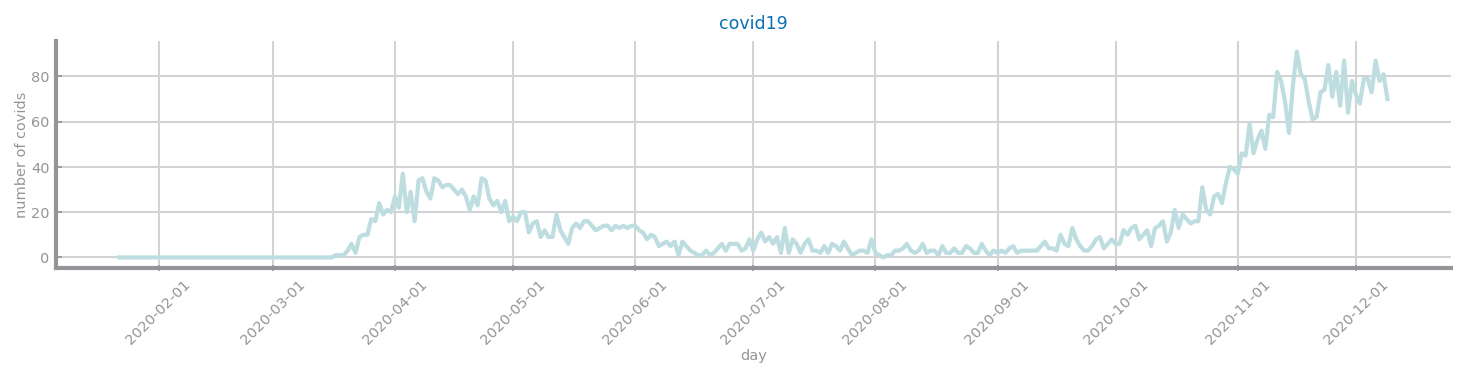

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import scipy.stats as _stats
import numpy as np
import ts_functions as ts
import ds_functions as ds
from data import *

data = get_covid_data()
data = data.sort_index()
data = data.diff()
data = data.fillna(0)

FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
ts.plot_series(data, x_label='day', y_label='number of covids', title='covid19')
plt.xticks(rotation = 45)
plt.show()

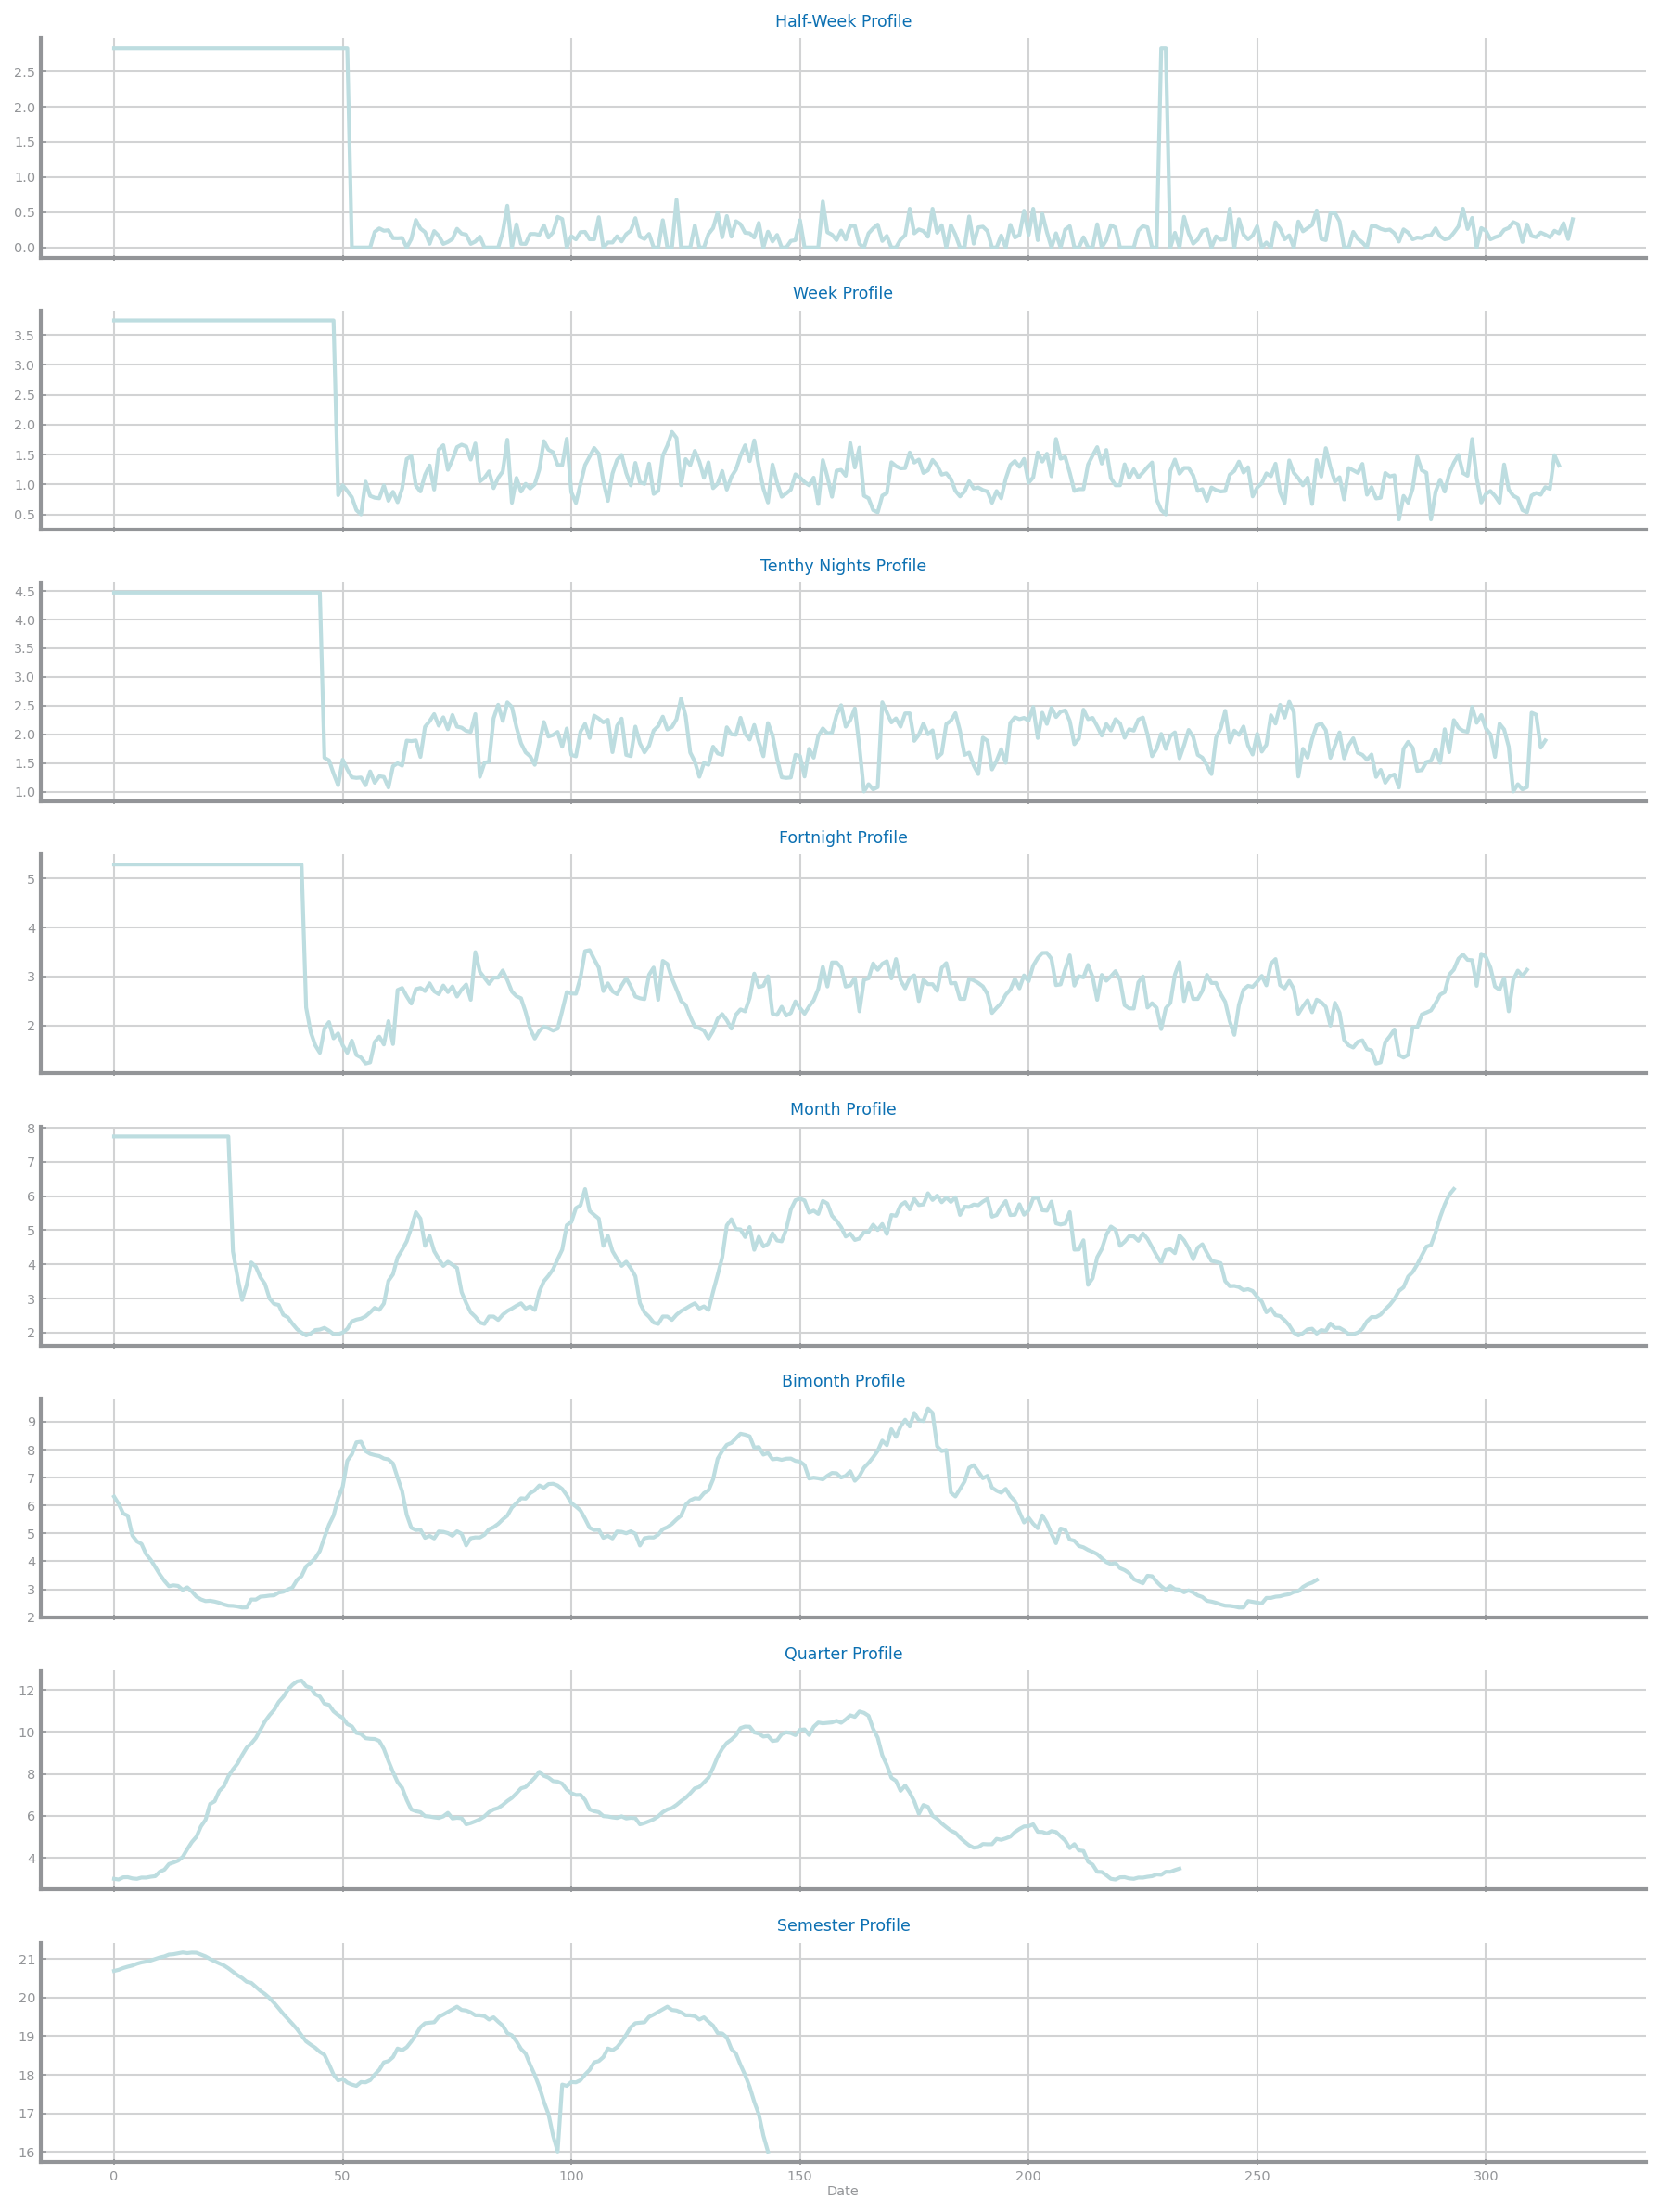

In [6]:
import matrixprofile as mp

all_windows = [
    ('Half-Week', 4),
    ('Week', 7),
    ('Tenthy Nights', 10),
    ('Fortnight', 14),
    ('Month', 30),
    ('Bimonth', 2*30),
    ('Quarter', 3 * 30),
    ('Semester', 6 * 30),
]

def compute_matrix_profiles(df: pd.DataFrame, windows: list) :
    profiles = {}
    for label, size in windows:
        key = '{} Profile'.format(label)
        profiles[key] = mp.compute(df['deaths'].values, size)
    return profiles

def plot_signal_data(profiles: dict, windows: list):
    _, axes = plt.subplots(len(windows), 1, sharex=True, figsize=(FIG_WIDTH, len(windows)*FIG_HEIGHT))
    for ax_idx, window in enumerate(windows):
        key = '{} Profile'.format(window[0])
        axes[ax_idx].plot(profiles[key]['mp'])
        axes[ax_idx].set_title(key)

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

all_profiles = compute_matrix_profiles(data, all_windows)
plot_signal_data(all_profiles, all_windows)


In [7]:
def compute_all_profiles(profiles: dict, windows: list, k: int, type: str='motifs'):
    discover_function = mp.discover.motifs
    if type == 'discords':
        discover_function = mp.discover.discords

    for label, _ in windows:
        key = '{} Profile'.format(label)
        profiles[key] = discover_function(profiles[key], k=k)

compute_all_profiles(all_profiles, all_windows, k=5, type='motifs')


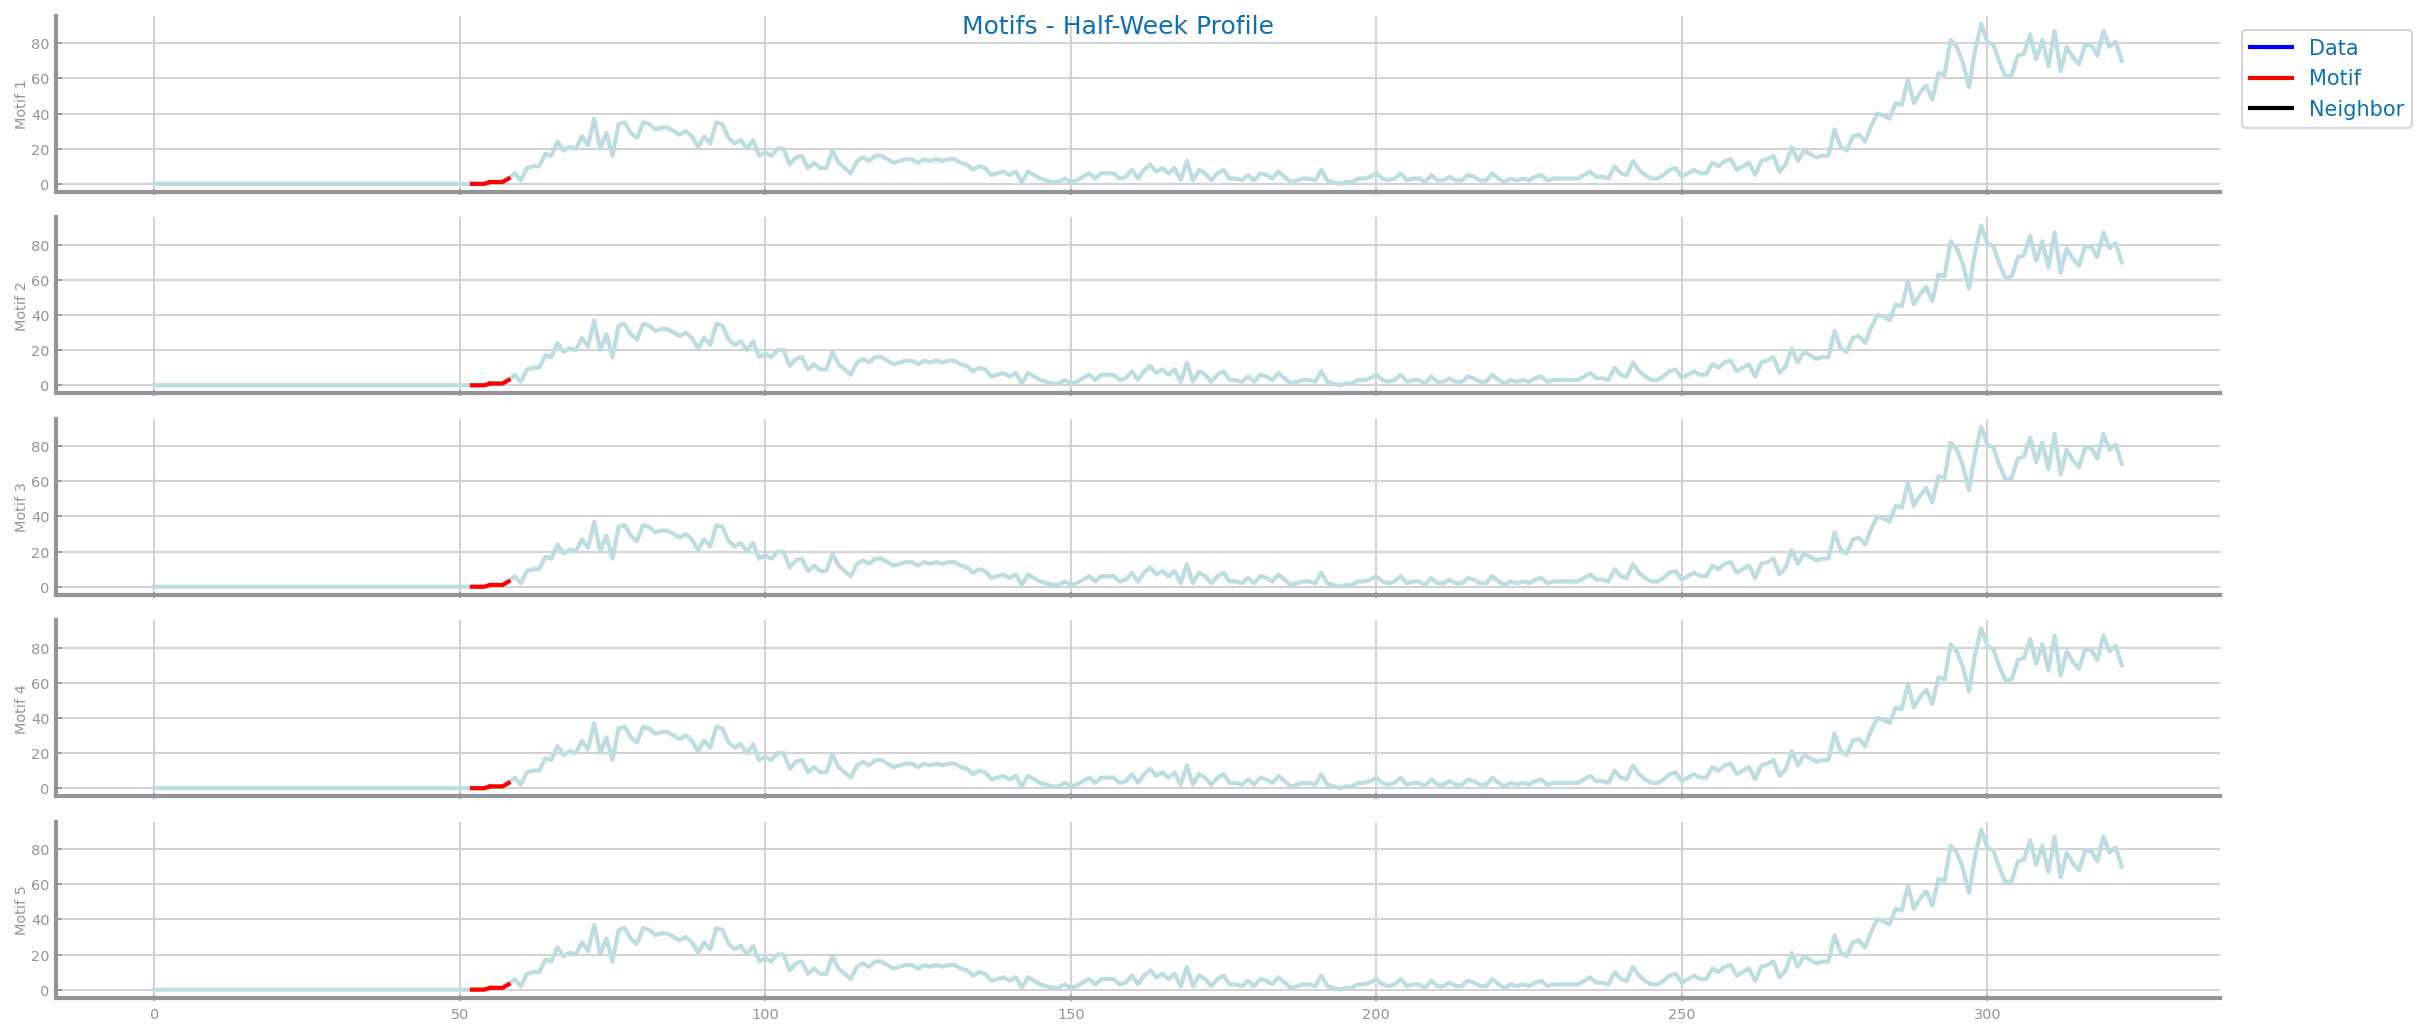

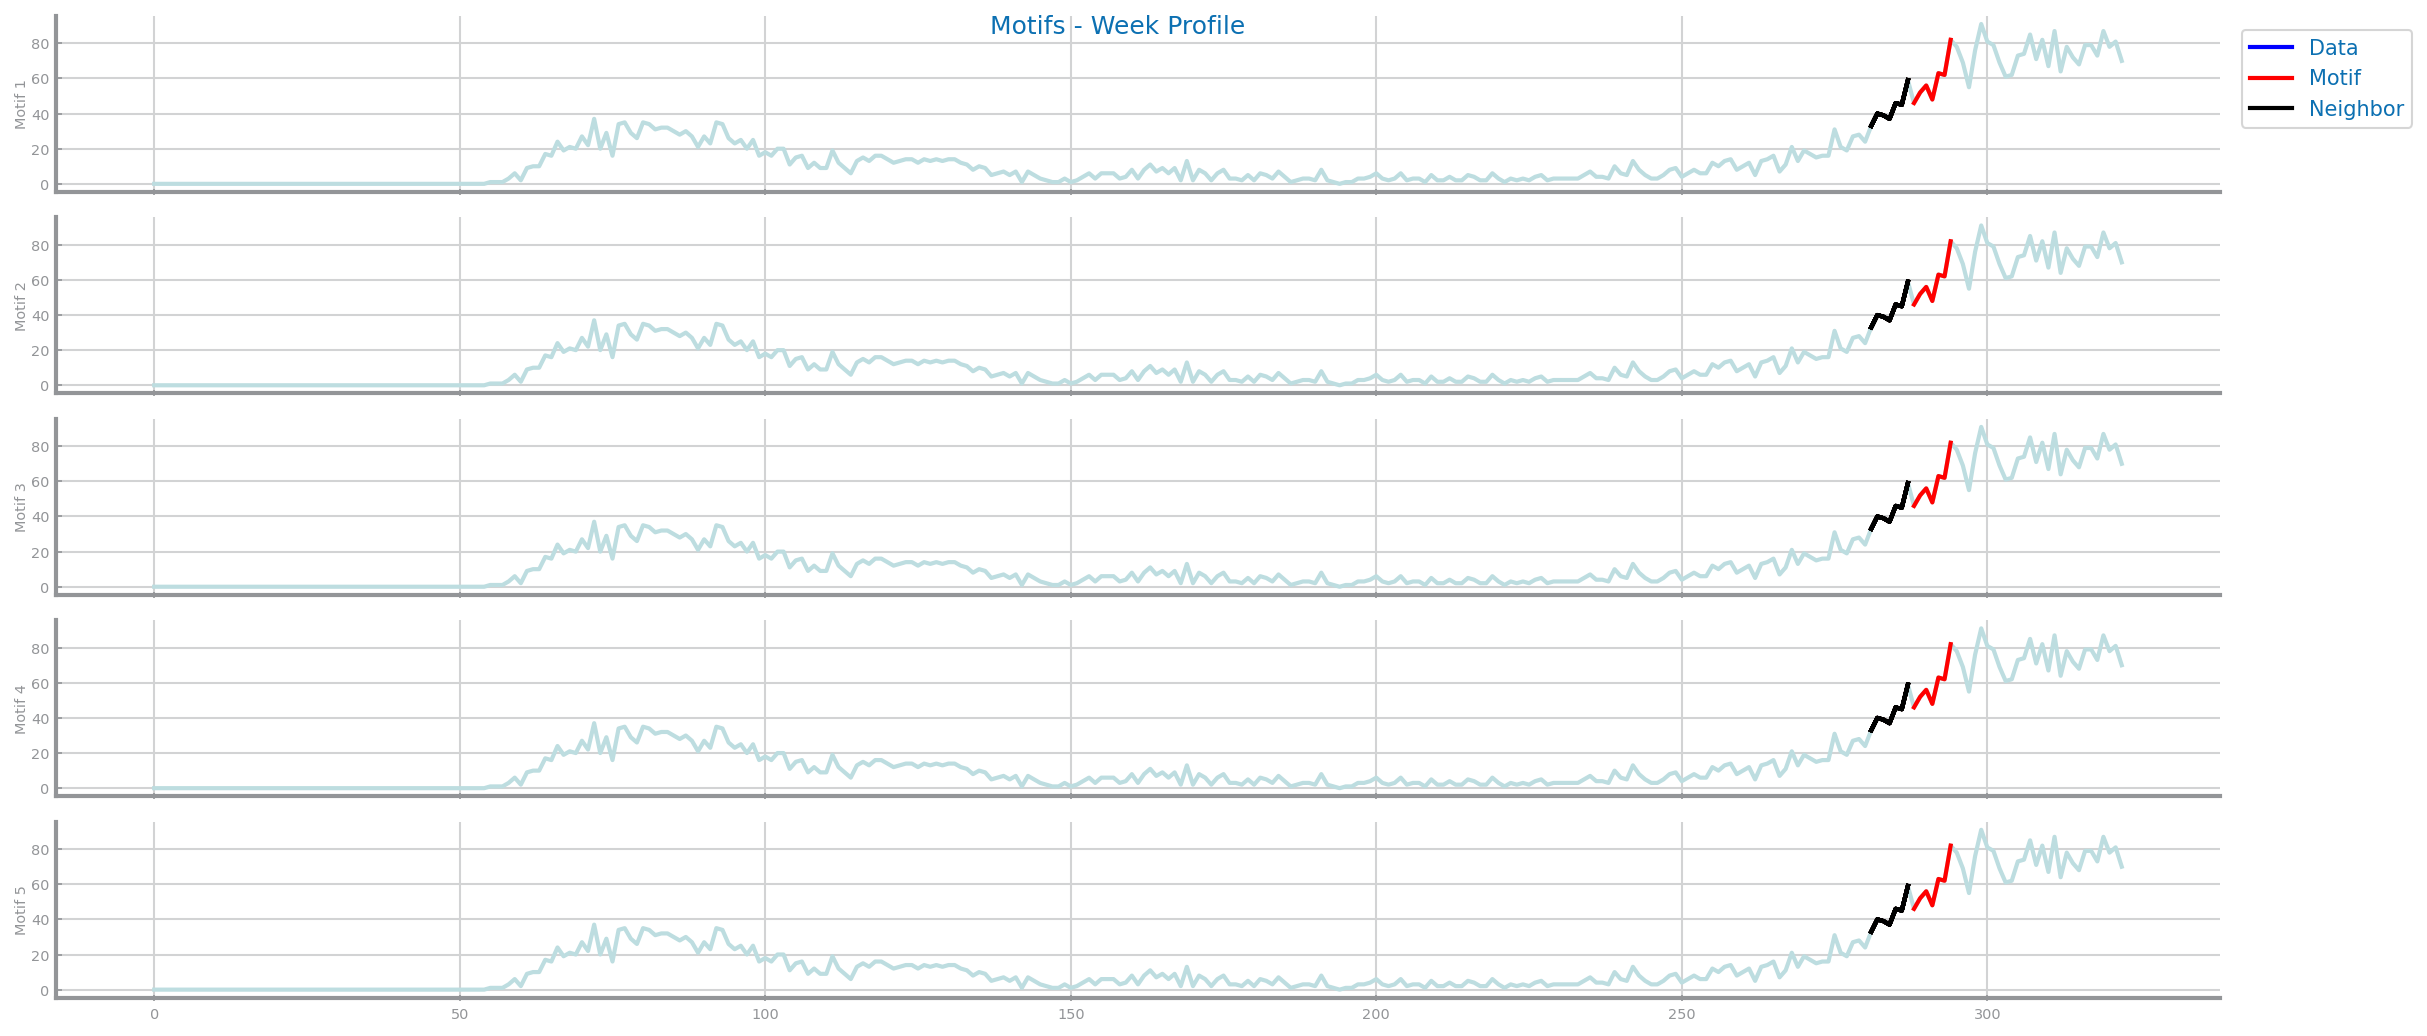

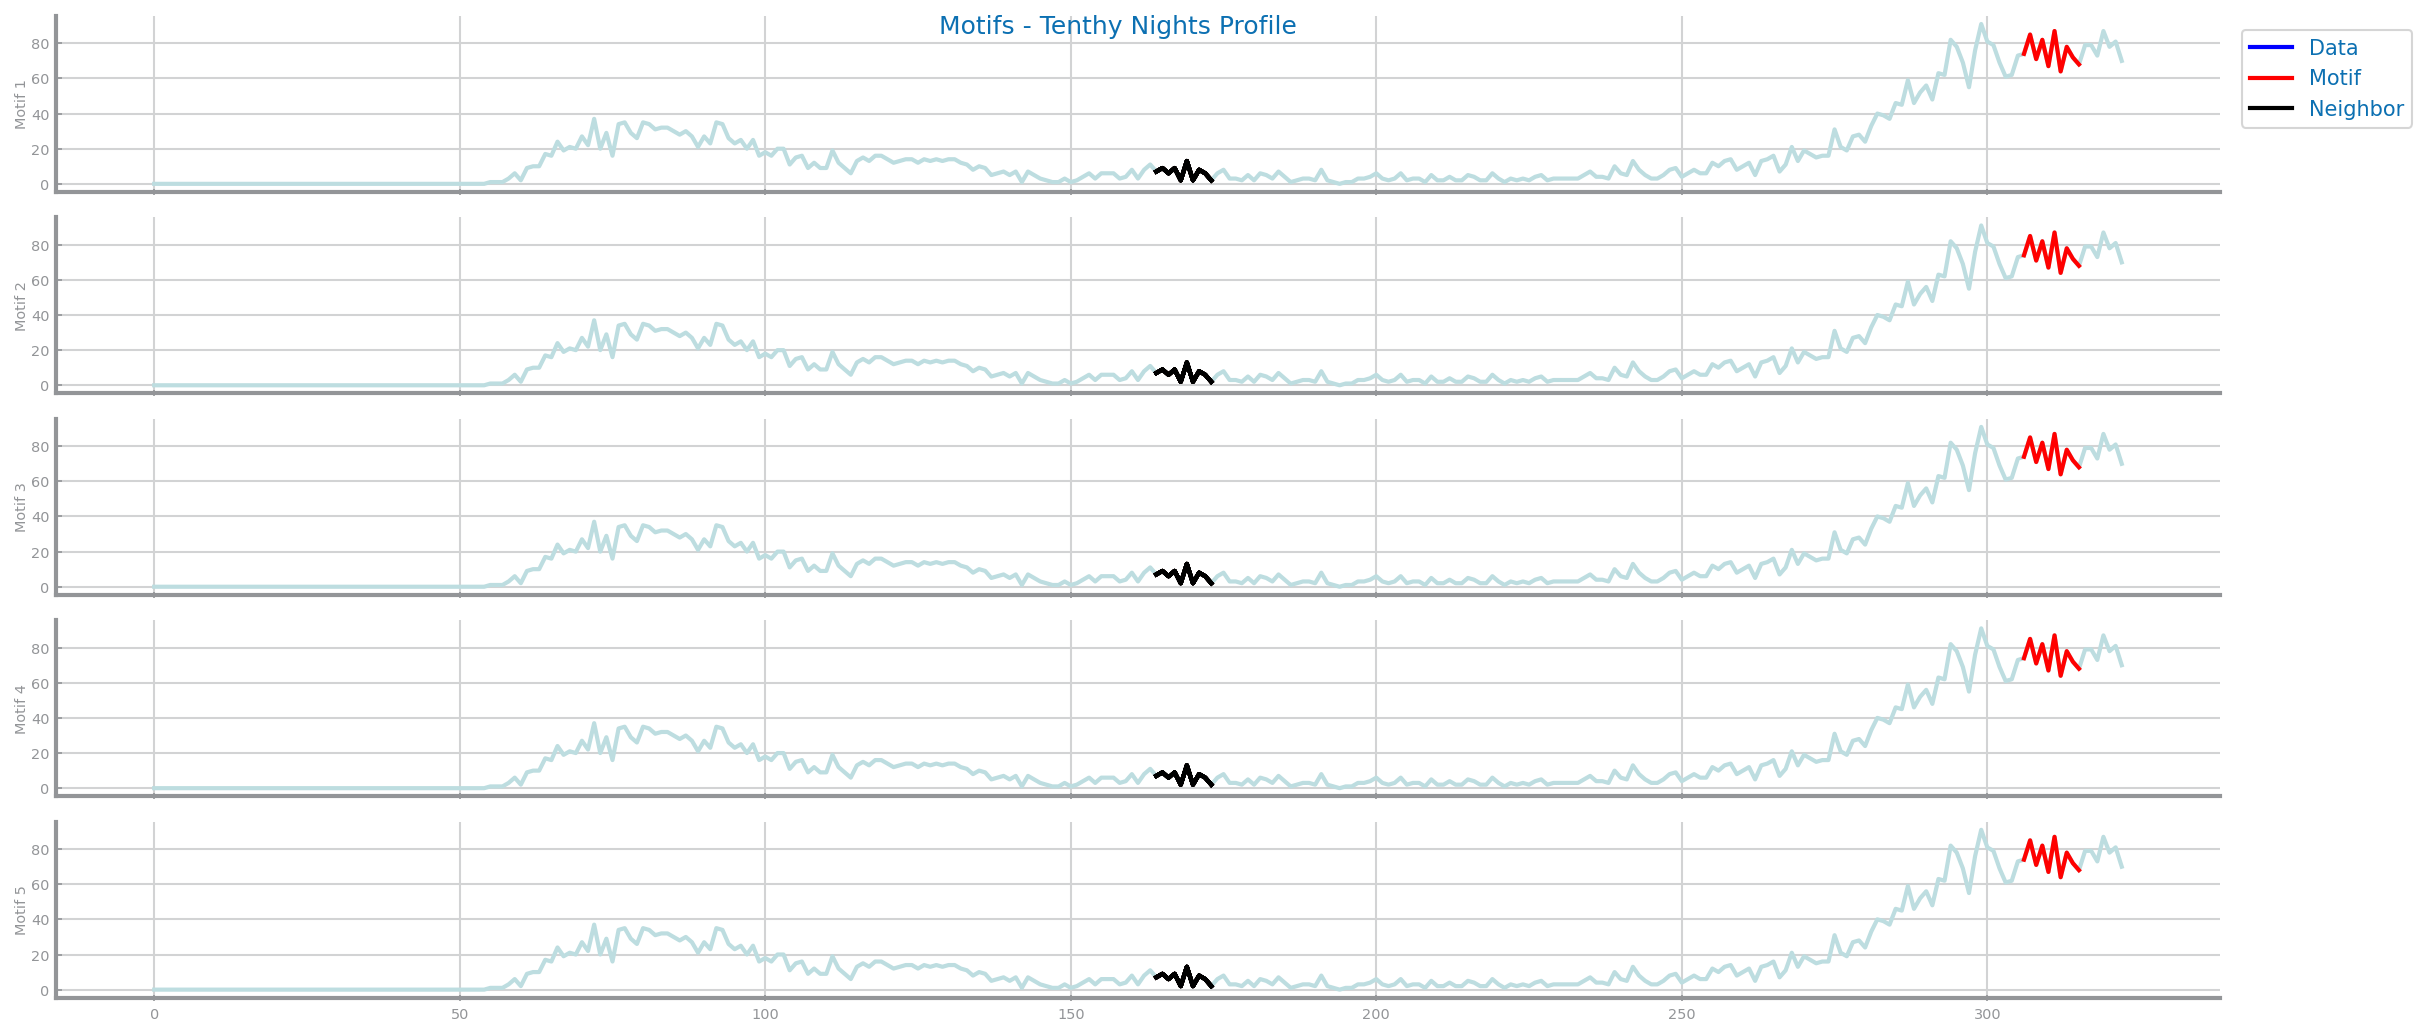

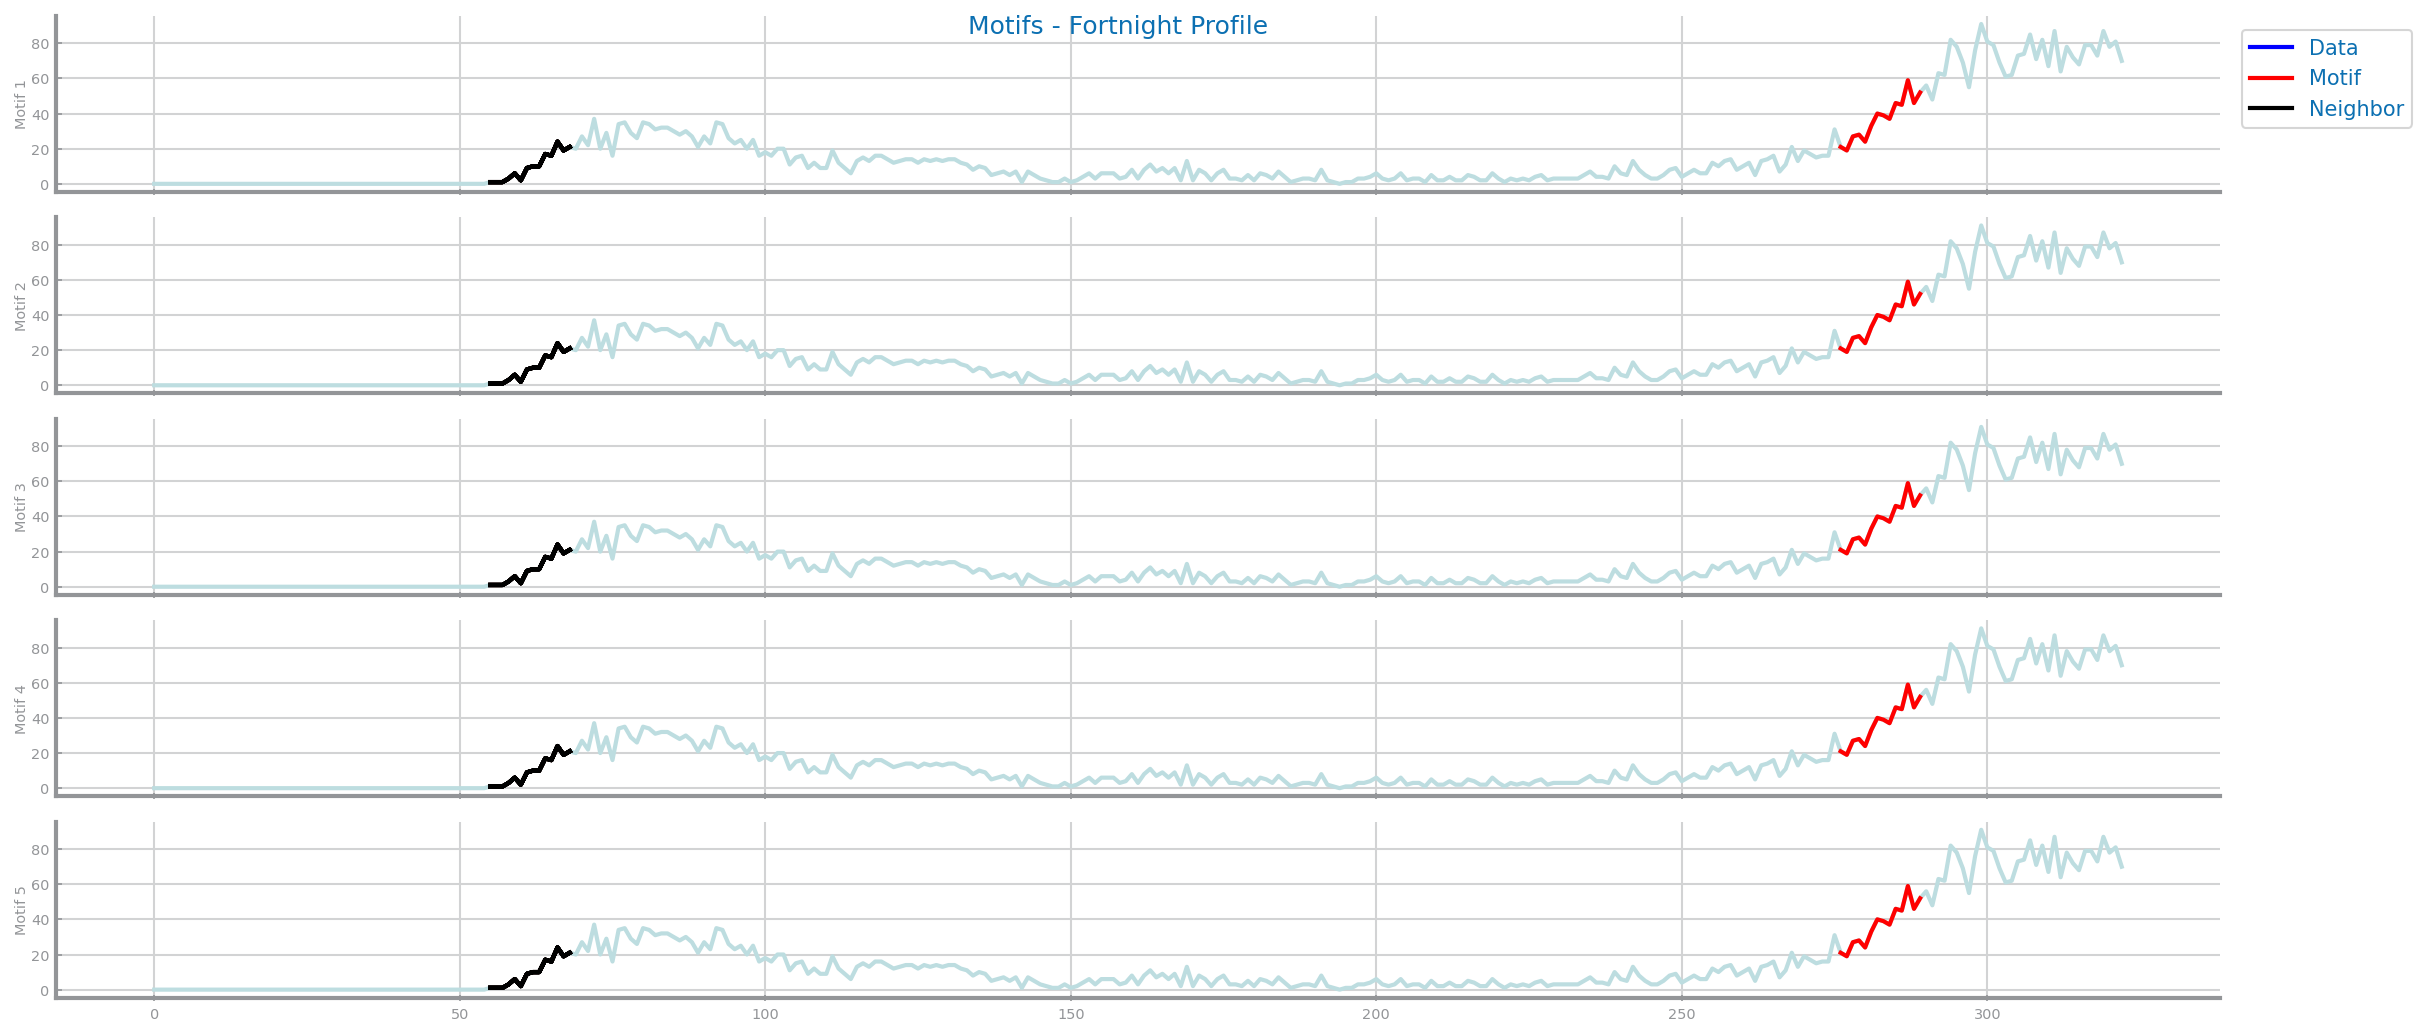

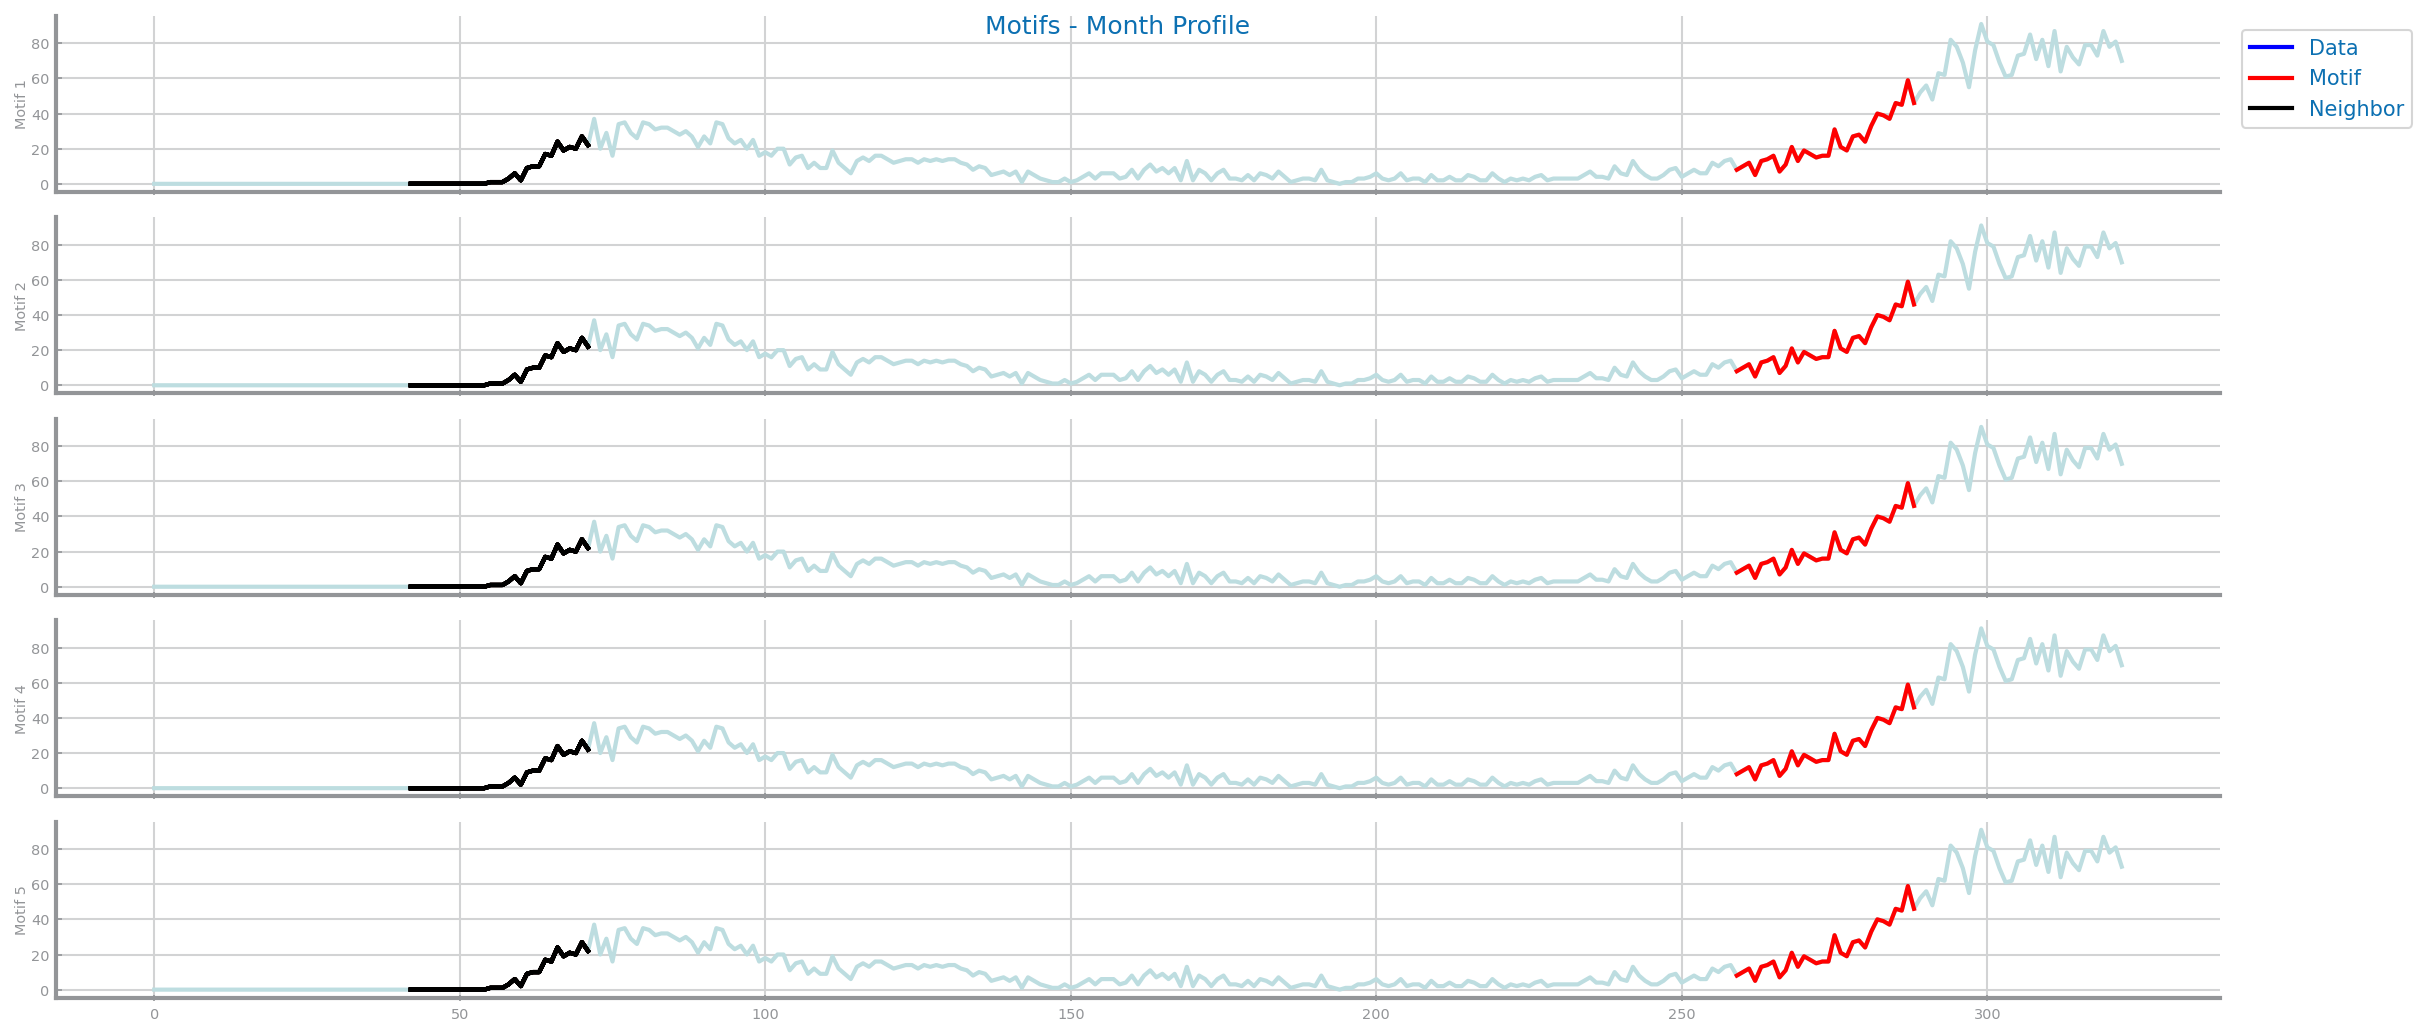

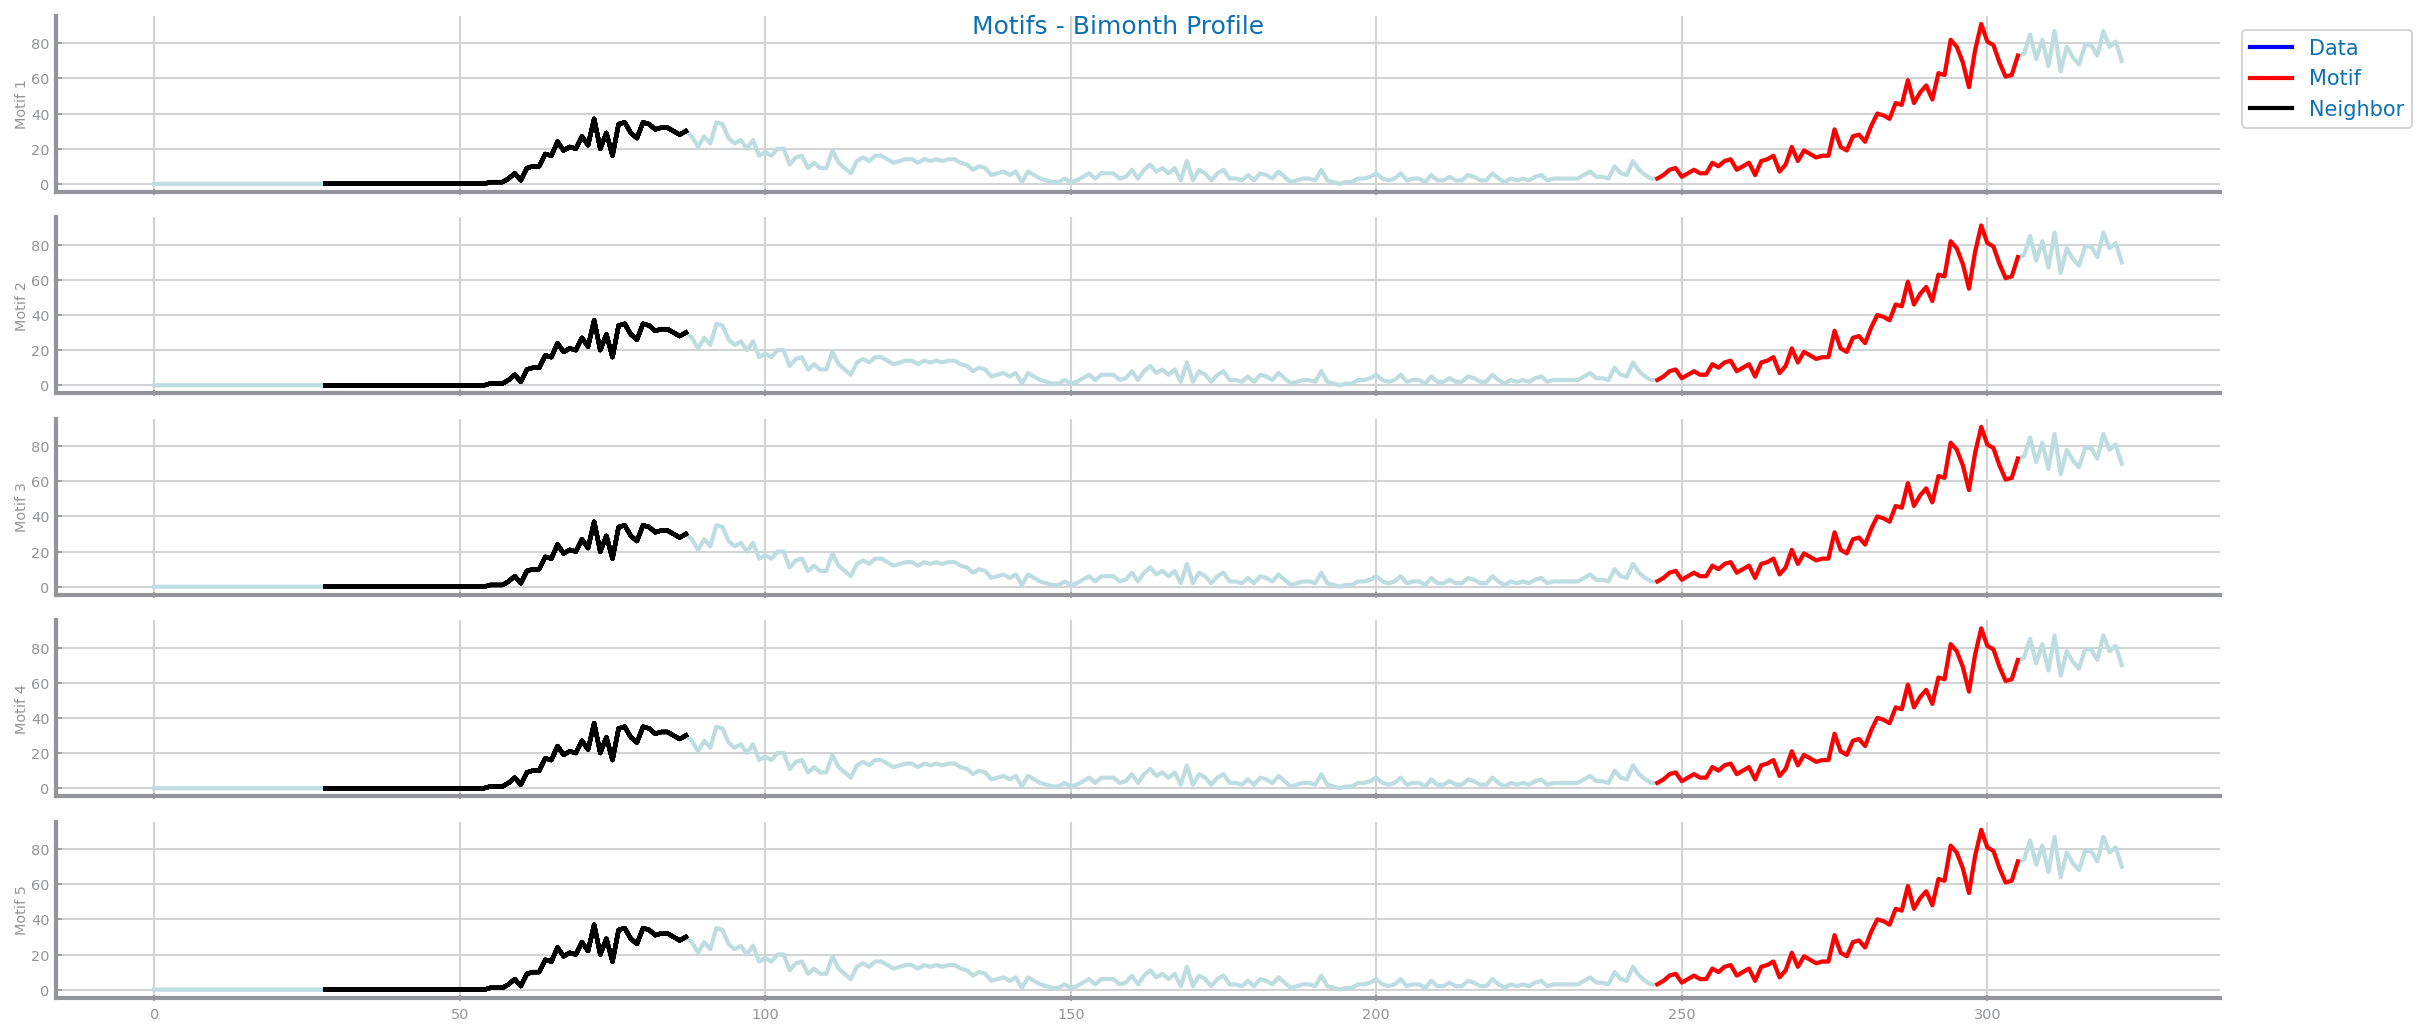

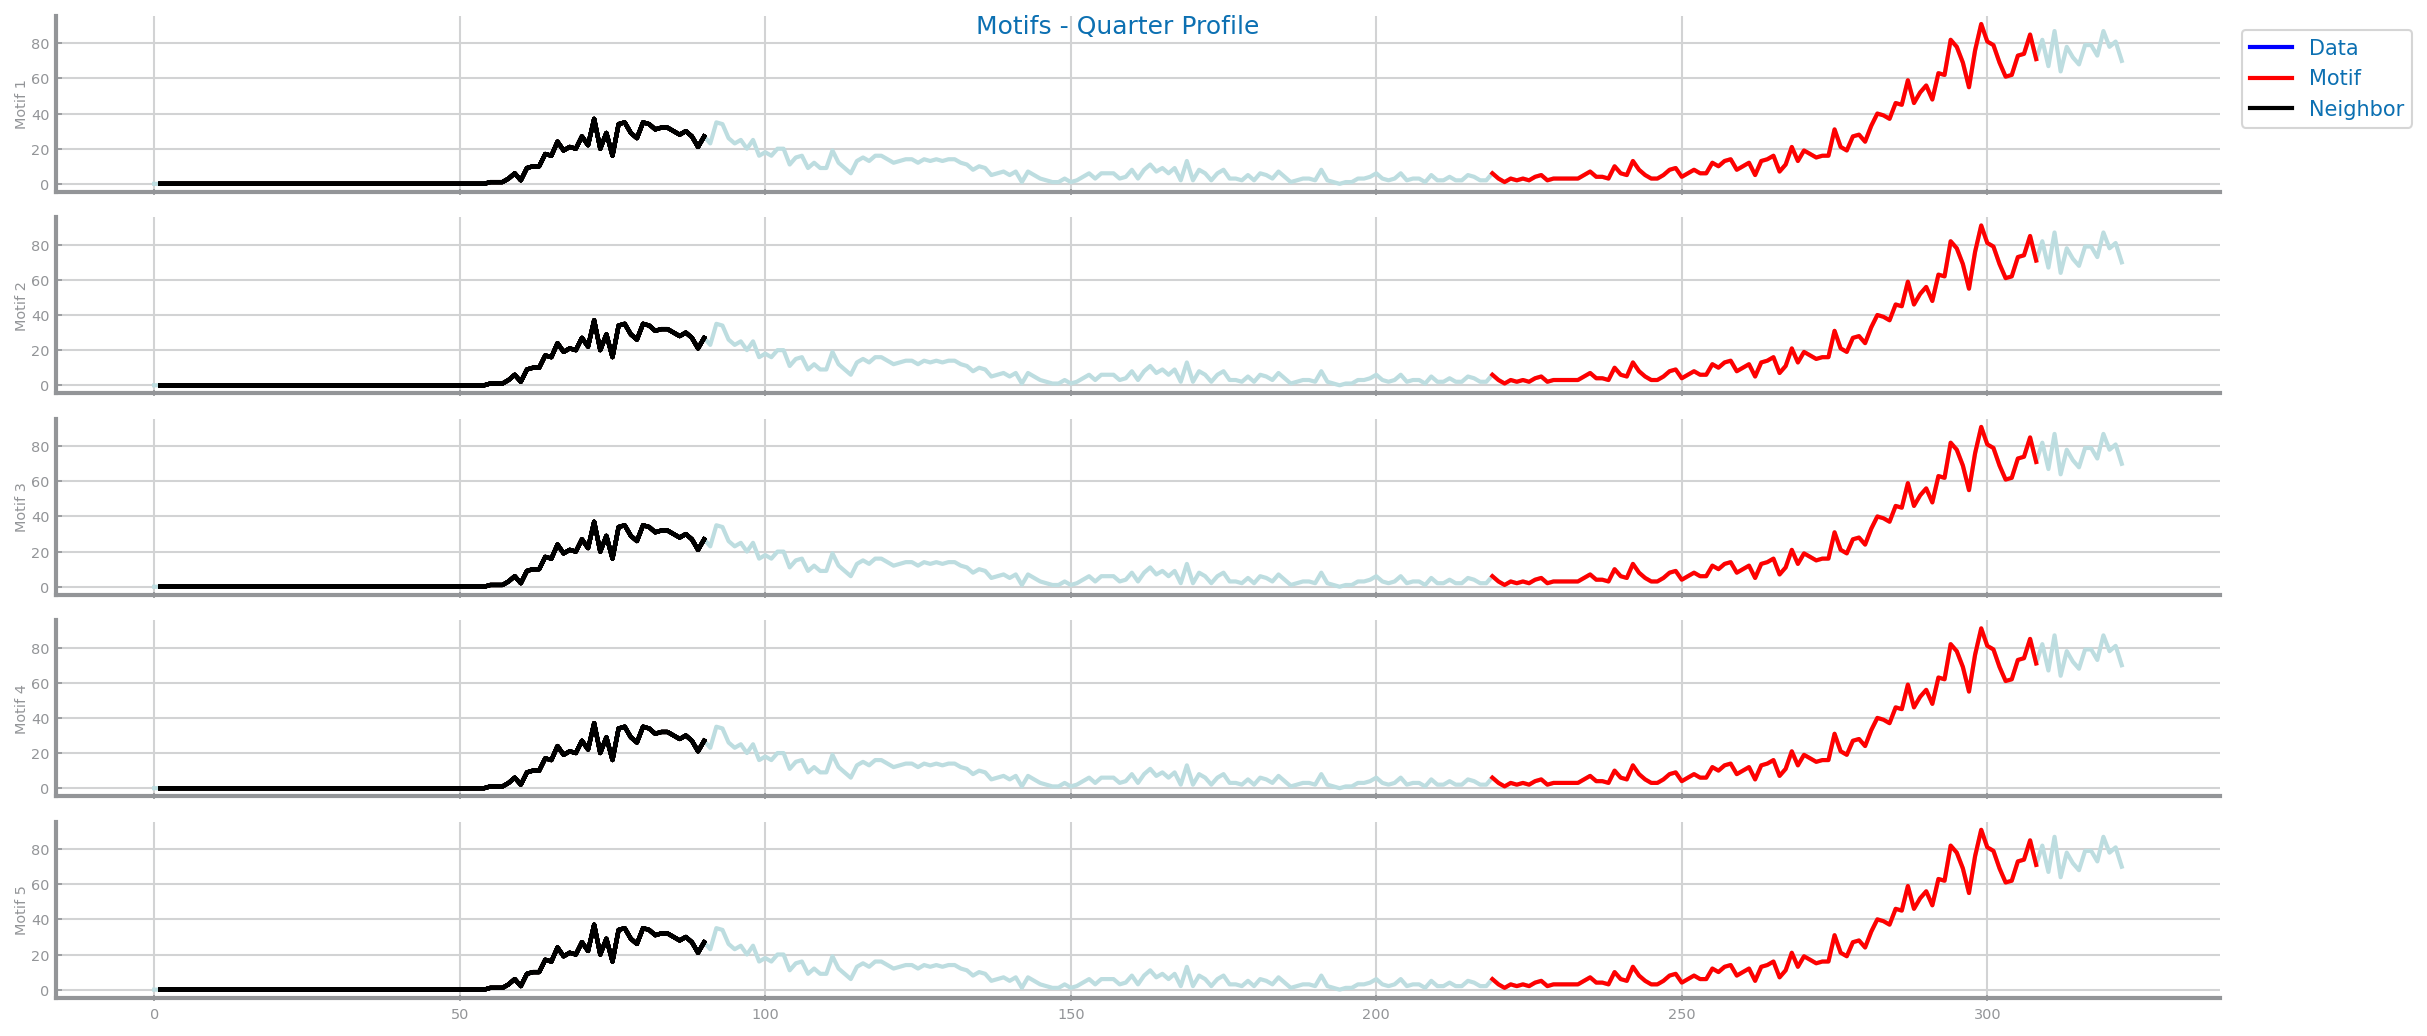

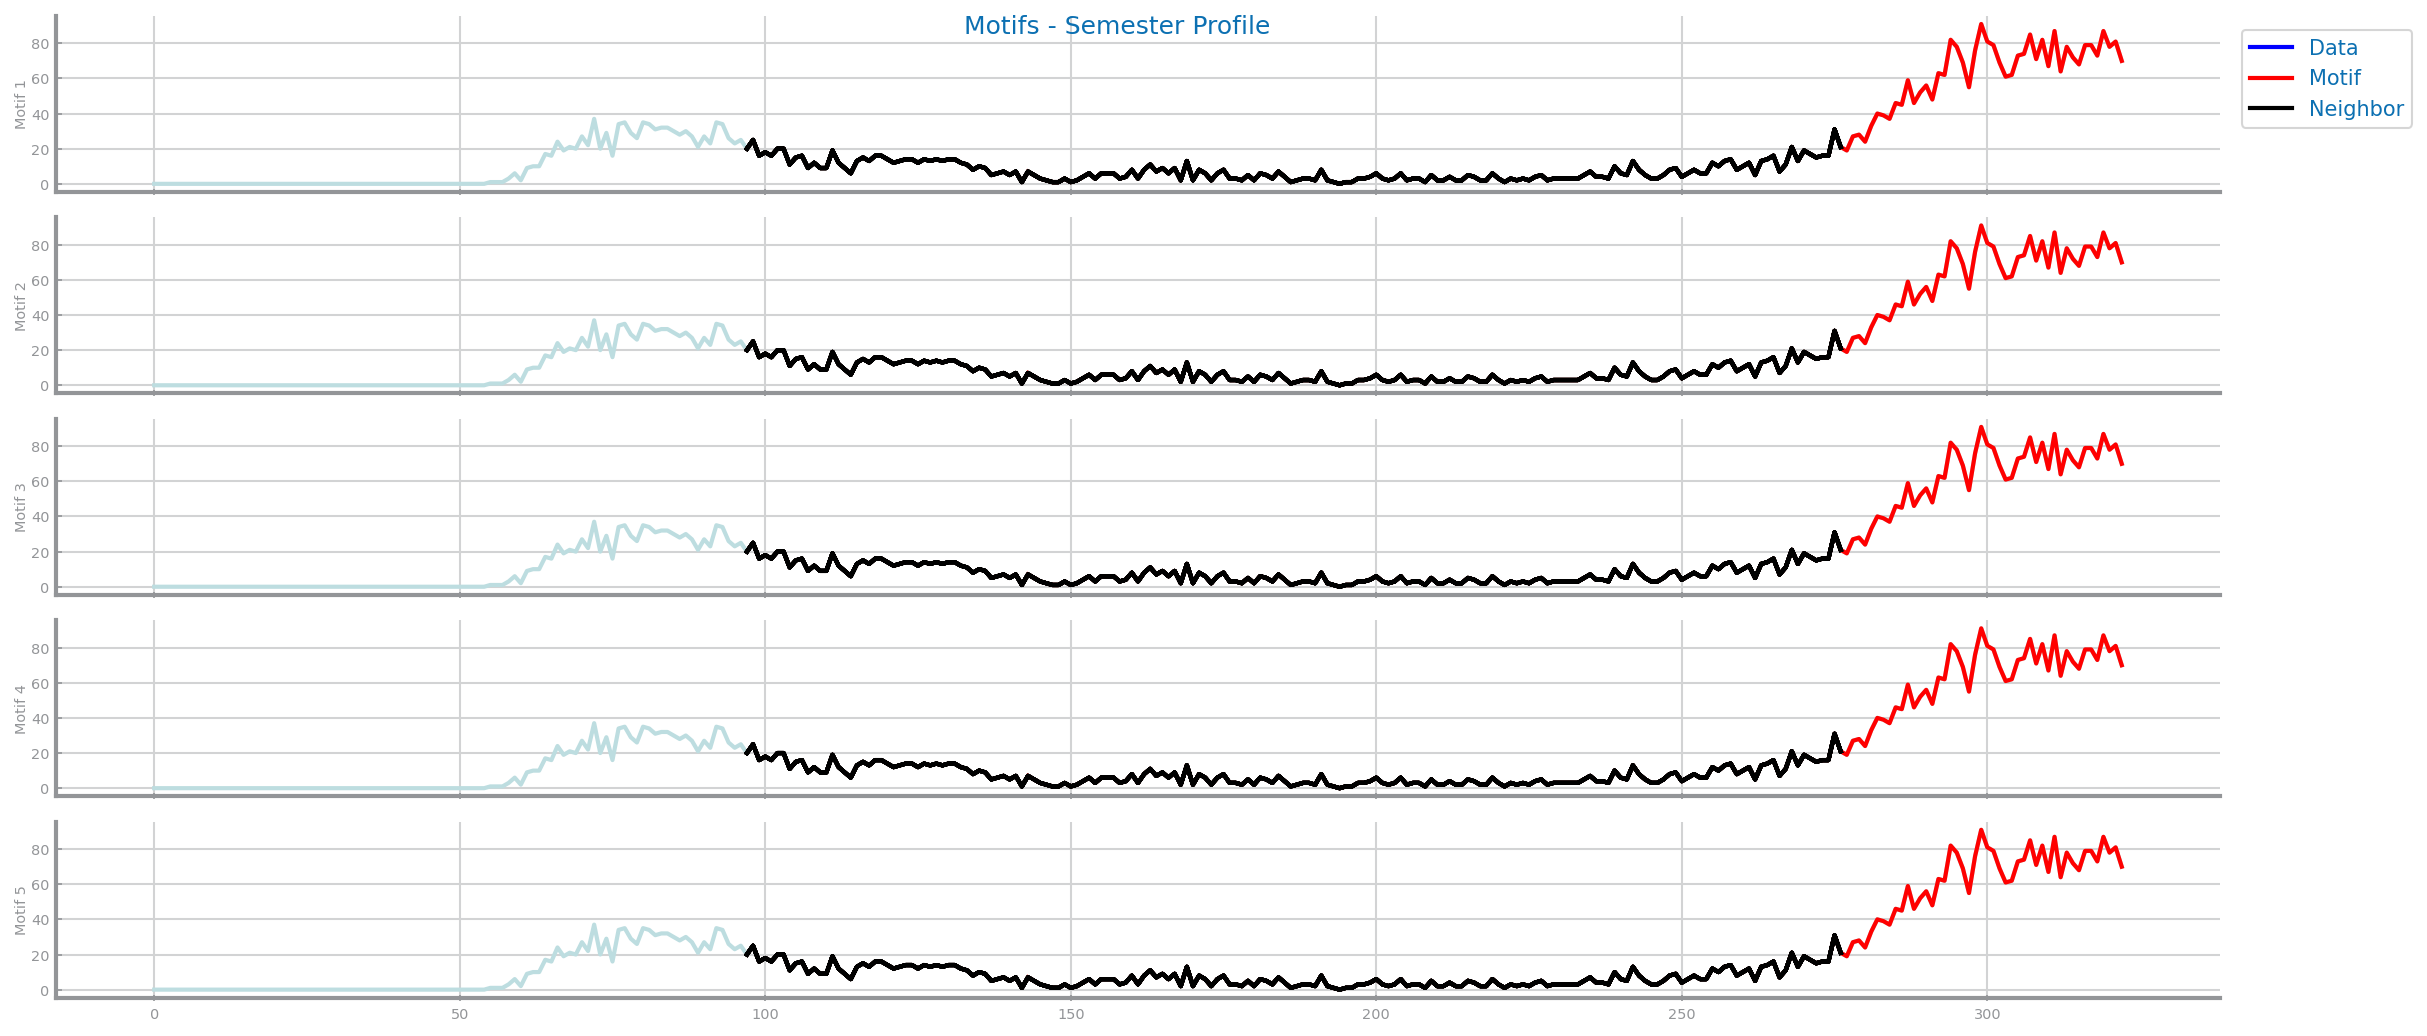

In [8]:
def show_profile(profile, title, type):
    lst_figs = mp.visualize(profile)
    for i in range(len(lst_figs)-1):
        plt.close(lst_figs[i])
    plt.suptitle(type + ' - ' + title)
    plt.show()

for i in range(len(all_windows)):
    title = all_windows[i][0]+' Profile'
    show_profile(all_profiles[title], title, 'Motifs')